In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
X_train = pd.read_csv('C:\\Users\himab\Documents\spring2020\ML\hw2\hw2-data\Gaussian_process\X_train.csv', header = None)
y_train = pd.read_csv('C:\\Users\himab\Documents\spring2020\ML\hw2\hw2-data\Gaussian_process\y_train.csv', header = None)
X_test = pd.read_csv('C:\\Users\himab\Documents\spring2020\ML\hw2\hw2-data\Gaussian_process\X_test.csv', header = None)
y_test = pd.read_csv('C:\\Users\himab\Documents\spring2020\ML\hw2\hw2-data\Gaussian_process\y_test.csv', header = None)

In [4]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train1 = [[x[3]] for x in X_train]
X_test1 = [[x[3]] for x in X_test]

In [5]:
def Rij(list_1,list_2,b):
    a = []
    s = 0
    for i in range(len(list_1)):
        s += pow((list_1[i]-list_2[i]),2)
    return math.exp(-s/b)

def KxDn(x,Dn,b):
    list1 = []
    for j in range(len(Dn)):
        list1.append(Rij(x,Dn[j],b))
    return list1

def Kn(X_train,b):
    list1 = []
    for i in range(len(X_train)):
        list2 = []
        for j in range(len(X_train)):
            list2.append(Rij(X_train[i],X_train[j],b))
        list1.append(list2)
    return list1

def mu(x,X_train,b,sig_sq, y):
    list1 = []
    for i in range(len(x)):
        a = np.array(KxDn(x[i],X_train,b))
        second_term = (sig_sq * np.identity(len(X_train))) + Kn(X_train,b)
        second_term_inv = np.linalg.inv(second_term)
        mat_mul1 = np.matmul(a,second_term_inv)
        list1.append(np.matmul(mat_mul1,y))
    return(list1)

In [6]:
y_pred = mu(X_test1,X_train1,5,2,y_train)
y_pred

[array([-4.823604]),
 array([-6.63219699]),
 array([2.43743212]),
 array([-7.13619193]),
 array([-3.05341625]),
 array([5.88381295]),
 array([-4.88336298]),
 array([2.81290603]),
 array([-8.58107112]),
 array([9.62821732]),
 array([-8.72016964]),
 array([8.18753644]),
 array([-8.49681486]),
 array([-4.27077858]),
 array([6.1607699]),
 array([-9.6271414]),
 array([-2.57546271]),
 array([2.29882628]),
 array([7.73535531]),
 array([-2.64578186]),
 array([-9.50942497]),
 array([8.94476969]),
 array([-0.39732255]),
 array([-7.02561172]),
 array([-9.44555647]),
 array([-6.5052041]),
 array([9.19562524]),
 array([5.76640163]),
 array([2.09095453]),
 array([-5.61469147]),
 array([-7.49957919]),
 array([-6.10901822]),
 array([0.0267498]),
 array([-7.74547698]),
 array([-6.24365664]),
 array([1.34897193]),
 array([4.9154902]),
 array([6.54567573]),
 array([5.65730959]),
 array([-4.71065546]),
 array([6.81910398]),
 array([-4.74845867])]

In [7]:
y_train

array([[ -3.4458  ],
       [ -5.4459  ],
       [  5.5541  ],
       [ 11.554   ],
       [ 12.254   ],
       [ 12.654   ],
       [ -1.1459  ],
       [  1.5541  ],
       [ -3.2459  ],
       [ -9.4459  ],
       [  0.55408 ],
       [ -4.2459  ],
       [ 13.854   ],
       [ -4.4459  ],
       [ -7.4459  ],
       [ -5.4459  ],
       [  8.8541  ],
       [-10.446   ],
       [ 11.054   ],
       [  0.55408 ],
       [ 19.954   ],
       [  4.9541  ],
       [-10.446   ],
       [  0.55408 ],
       [ -3.4459  ],
       [ -1.4459  ],
       [ 13.554   ],
       [ -4.4459  ],
       [ -8.4459  ],
       [ -1.9459  ],
       [-10.446   ],
       [  3.3541  ],
       [ -6.4459  ],
       [ -8.4459  ],
       [  6.5541  ],
       [  3.1541  ],
       [ -8.4459  ],
       [  0.35408 ],
       [  8.5541  ],
       [ -7.4459  ],
       [ -7.4459  ],
       [  7.0541  ],
       [  3.5541  ],
       [ 12.554   ],
       [  0.55408 ],
       [ -5.4459  ],
       [  0.75408 ],
       [-10.4

Text(0, 0.5, 'Predicted y values')

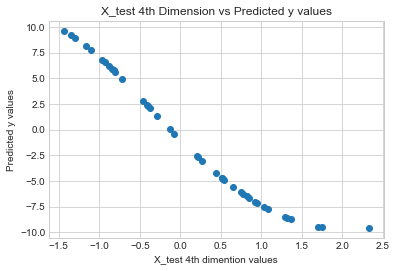

In [8]:
x_4_vals = [item for sublist in X_test1 for item in sublist]
y_4_vals = [item for sublist in y_pred for item in sublist]
plt.style.use('seaborn-whitegrid')
plt.plot(x_4_vals, y_4_vals, 'o');
plt.title('X_test (Car Weight) vs Predicted y values')
plt.xlabel('X_test Car Weight values')
plt.ylabel('Predicted y values')

In [9]:
temp = [[x[3]] for x in X_train]
y_pred_train = mu(temp,X_train1,5,2,y_train)
y_train_vals = [item for sublist in y_train for item in sublist]

Text(0, 0.5, 'Predicted y values')

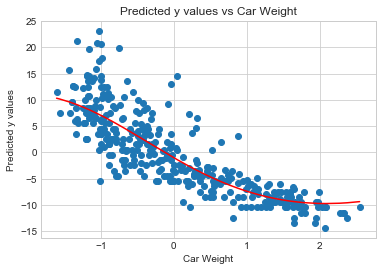

In [23]:
xtrain_4_vals = [item for sublist in temp for item in sublist]
y_4_vals = [item for sublist in y_pred_train for item in sublist]
xsortind = np.argsort(xtrain_4_vals)
plt.style.use('seaborn-whitegrid')
x_new = np.asarray(xtrain_4_vals).flatten()
y_new = np.asarray(y_train_vals).flatten()
y_pred_new = np.asarray(y_4_vals).flatten()
plt.scatter(x_new, y_new)
plt.plot(x_new[xsortind], y_pred_new[xsortind],'r');
plt.title('Predicted y values vs Car Weight')
plt.xlabel('Car Weight')
plt.ylabel('Predicted y values')